In [35]:
!pip install numpy==2.0.2
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("/content/user_data.csv", index_col=0)

In [52]:
df.head(20)

,purchase_amount,purchase_count,gender,age_group,signup_date,churn
0,52500.0,17.0,M,10s,2024-03-22,0
1,49300.0,14.0,M,50s,2024-10-05,0
2,53200.0,14.0,M,NaN,2024-12-04,1
3,57600.0,25.0,F,30s,2024-12-30,0
4,48800.0,11.0,F,40s,2024-11-26,0
5,48800.0,15.0,M,50s,2024-05-08,0
6,57900.0,16.0,F,30s,2024-12-09,1
7,53800.0,11.0,F,40s,2024-11-05,0
8,47700.0,8.0,M,40s,2024-03-29,0
9,52700.0,16.0,F,20s,2024-07-31,0


In [53]:
df.describe()

,purchase_amount,purchase_count,churn
count,2.000000e+02,190.000000,200.000000
mean,8.604699e+04,15.015789,0.290000
std,2.355967e+05,5.354597,0.454901
min,3.690000e+04,-2.000000,0.000000
25%,4.657500e+04,12.000000,0.000000
50%,5.020000e+04,15.000000,0.000000
75%,5.310000e+04,18.000000,1.000000
max,2.017221e+06,28.000000,1.000000


In [54]:
df.isnull().sum()

,0
purchase_amount,0
purchase_count,10
gender,0
age_group,5
signup_date,0
churn,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   purchase_amount  200 non-null    float64
 1   purchase_count   190 non-null    float64
 2   gender           200 non-null    object 
 3   age_group        195 non-null    object 
 4   signup_date      200 non-null    object 
 5   churn            200 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 19.0+ KB


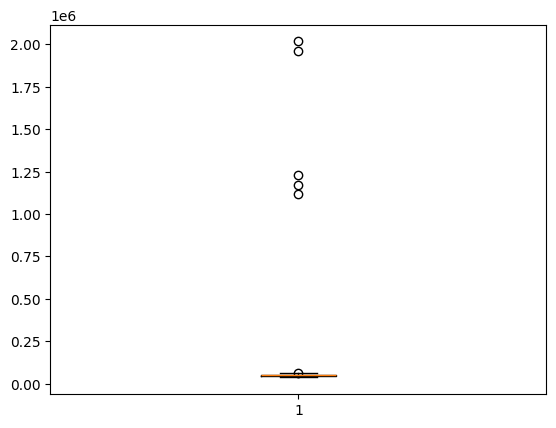

In [56]:
plt.boxplot(df["purchase_amount"])
plt.show()

In [57]:
df_outlier = df.copy()

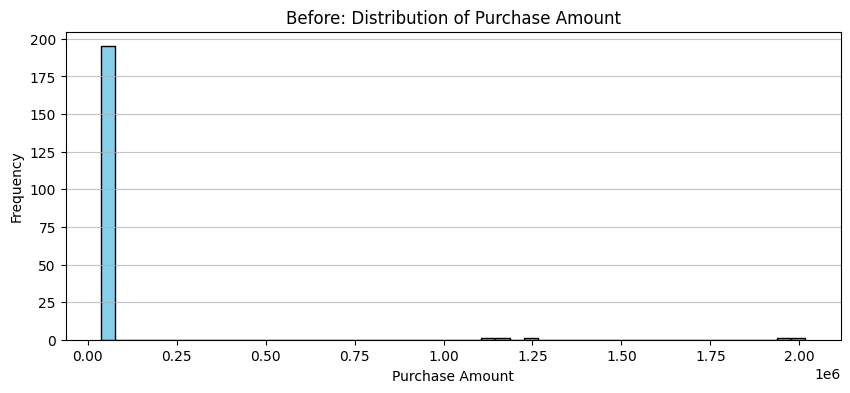

In [58]:
# --- 1. 現状の分布を確認 ---
plt.figure(figsize=(10, 4))
plt.hist(df_outlier["purchase_amount"], bins=50, color='skyblue', edgecolor='black')
plt.title("Before: Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [59]:
print(df_outlier["purchase_amount"].mean())
print(df_outlier["purchase_amount"].std())
mean = df_outlier["purchase_amount"].mean()
std = df_outlier["purchase_amount"].std()

# 3シグマの上限・下限を計算
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# (df_outlier["purchase_amount"] < lower_bound) | (df_outlier["purchase_amount"] > upper_bound)
df_outlier.loc[(df_outlier["purchase_amount"] < lower_bound) | (df_outlier["purchase_amount"] > upper_bound),"purchase_amount" ] = np.nan
df_outlier.info()

86046.99
235596.72660242766
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   purchase_amount  195 non-null    float64
 1   purchase_count   190 non-null    float64
 2   gender           200 non-null    object 
 3   age_group        195 non-null    object 
 4   signup_date      200 non-null    object 
 5   churn            200 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 19.0+ KB


In [60]:
# df_outlier["unit_price"] = df_outlier["purchase_amount"] / df_outlier["purchase_count"]

In [61]:
# # --- 1. 現状の分布を確認 ---
# plt.figure(figsize=(7, 4))
# plt.hist(df_outlier["unit_price"], bins=50, color='skyblue', edgecolor='black')
# plt.xlabel("Unit Price")
# plt.ylabel("Frequency")
# plt.grid(axis='y', alpha=0.75)
# plt.show()

# 欠損値データの補完

In [64]:
df_outlier.isnull().sum()

,0
purchase_amount,5
purchase_count,10
gender,0
age_group,5
signup_date,0
churn,0


In [65]:
# 数値列の欠損は平均で保管、カテゴリ列の欠損は最頻値で補完
df_outlier["purchase_amount"] = df_outlier["purchase_amount"].fillna(df_outlier["purchase_amount"].mean())
df_outlier["purchase_count"] = df_outlier["purchase_count"].fillna(df_outlier["purchase_count"].mean())
df_outlier["age_group"] = df_outlier["age_group"].fillna(df_outlier["age_group"].mode()[0])



In [71]:
df_outlier.isnull().sum()

,0
purchase_amount,0
purchase_count,0
gender,0
age_group,0
signup_date,0
churn,0


In [70]:
print(type(df_outlier["age_group"].mode()[0]))
print(type(df_outlier["age_group"].mode()))

<class 'str'>
<class 'pandas.core.series.Series'>


In [73]:
df["churn"].value_counts()

,count
churn,
0,142
1,58


In [77]:
# value_countsと同じことをすると下記のような感じ
# df_outlier.groupby("churn").count()

,purchase_amount,purchase_count,gender,age_group,signup_date
churn,,,,,
0,142,142,142,142,142
1,58,58,58,58,58


In [79]:
!pip install imbalanced-learn==0.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.14.0
    Uninstalling imbalanced-learn-0.14.0:
      Successfully uninstalled imbalanced-learn-0.14.0


In [85]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

df_imb = df_outlier.copy()
X_imb = df_imb.drop("churn", axis=1)
Y_imb = df_imb["churn"]

#アンダーサンプリング
undersampler= RandomUnderSampler(random_state=42)
X_under, Y_under = undersampler.fit_resample(X_imb, Y_imb)

print("アンダーサンプリング")
print(Y_under.value_counts())

#オーバーサンプリング
oversampler= RandomOverSampler(random_state=42)
X_over, Y_over = oversampler.fit_resample(X_imb, Y_imb)

print("アンダーサンプリング")
print(Y_over.value_counts())

アンダーサンプリング
churn
0    58
1    58
Name: count, dtype: int64
アンダーサンプリング
churn
0    142
1    142
Name: count, dtype: int64


## 既存の特徴量の組み合わせから新たな特徴量を作る


In [87]:
df_temp = df_outlier.copy()

df_temp["gender_age"] = df_temp["gender"] + "_" + df_temp["age_group"]
df_temp

,purchase_amount,purchase_count,gender,age_group,signup_date,churn,gender_age
0,52500.0,17.000000,M,10s,2024-03-22,0,M_10s
1,49300.0,14.000000,M,50s,2024-10-05,0,M_50s
2,53200.0,14.000000,M,40s,2024-12-04,1,M_40s
3,57600.0,25.000000,F,30s,2024-12-30,0,F_30s
4,48800.0,11.000000,F,40s,2024-11-26,0,F_40s
...,...,...,...,...,...,...,...
195,51900.0,23.000000,F,40s,2024-12-07,0,F_40s
196,45600.0,15.015789,M,40s,2024-11-21,0,M_40s
197,50800.0,25.000000,M,20s,2024-05-09,0,M_20s
198,50300.0,7.000000,M,60s,2024-08-02,1,M_60s


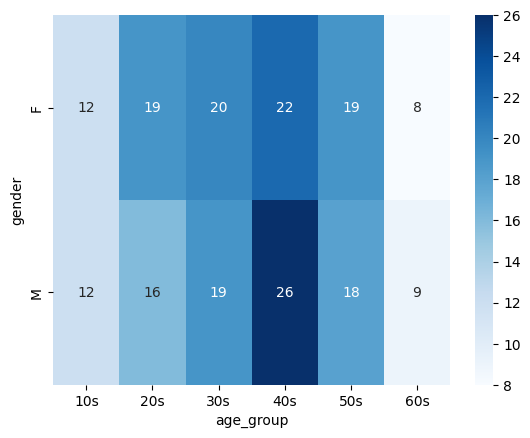

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(df_temp["gender"], df_temp["age_group"])
sns.heatmap(ct, annot=True, cmap="Blues")
plt.show()


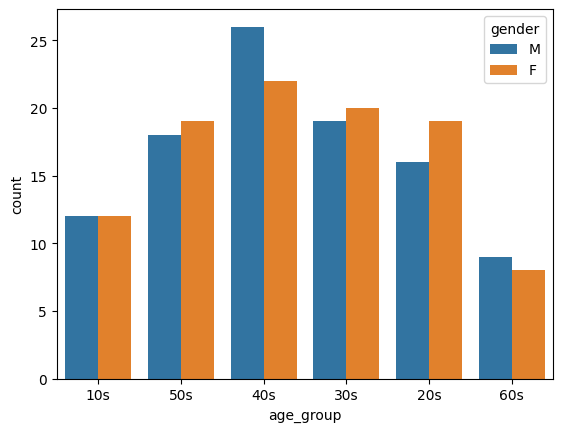

In [90]:
sns.countplot(data=df_temp, x="age_group", hue="gender")
plt.show()


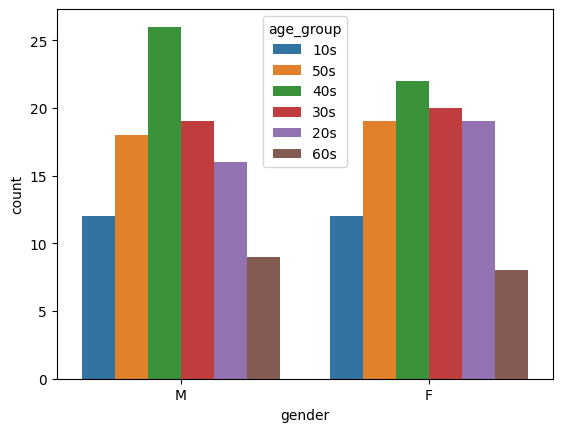

In [91]:
sns.countplot(data=df_temp, x="gender", hue="age_group")
plt.show()


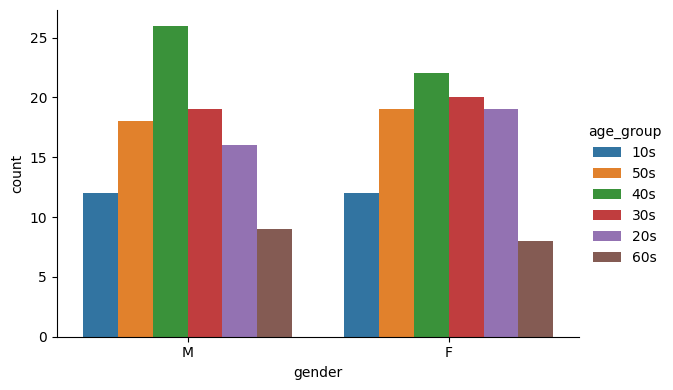

In [94]:
sns.catplot(
    data=df_temp,
    x="gender",
    hue="age_group",
    kind="count",
    height=4,
    aspect=1.5
)


## エンコーディングの処理


In [95]:
from sklearn.preprocessing import LabelEncoder

df_temp = df_outlier.copy()

df_temp["gender"] = LabelEncoder().fit_transform(df_temp["gender"])

In [96]:
df_temp

,purchase_amount,purchase_count,gender,age_group,signup_date,churn
0,52500.0,17.000000,1,10s,2024-03-22,0
1,49300.0,14.000000,1,50s,2024-10-05,0
2,53200.0,14.000000,1,40s,2024-12-04,1
3,57600.0,25.000000,0,30s,2024-12-30,0
4,48800.0,11.000000,0,40s,2024-11-26,0
...,...,...,...,...,...,...
195,51900.0,23.000000,0,40s,2024-12-07,0
196,45600.0,15.015789,1,40s,2024-11-21,0
197,50800.0,25.000000,1,20s,2024-05-09,0
198,50300.0,7.000000,1,60s,2024-08-02,1


In [97]:
# one-hot encoding
df_temp = df_outlier.copy()
df_temp = pd.get_dummies(df_temp, columns=["gender", "age_group"], drop_first=True)
df_temp

,purchase_amount,purchase_count,signup_date,churn,gender_F,gender_M,age_group_10s,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s
0,52500.0,17.000000,2024-03-22,0,False,True,True,False,False,False,False,False
1,49300.0,14.000000,2024-10-05,0,False,True,False,False,False,False,True,False
2,53200.0,14.000000,2024-12-04,1,False,True,False,False,False,True,False,False
3,57600.0,25.000000,2024-12-30,0,True,False,False,False,True,False,False,False
4,48800.0,11.000000,2024-11-26,0,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
195,51900.0,23.000000,2024-12-07,0,True,False,False,False,False,True,False,False
196,45600.0,15.015789,2024-11-21,0,False,True,False,False,False,True,False,False
197,50800.0,25.000000,2024-05-09,0,False,True,False,True,False,False,False,False
198,50300.0,7.000000,2024-08-02,1,False,True,False,False,False,False,False,True


In [98]:
# one-hot encoding
df_temp = df_outlier.copy()
df_temp = pd.get_dummies(df_temp, columns=["gender", "age_group"], drop_first=True)
df_temp

,purchase_amount,purchase_count,signup_date,churn,gender_M,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s
0,52500.0,17.000000,2024-03-22,0,True,False,False,False,False,False
1,49300.0,14.000000,2024-10-05,0,True,False,False,False,True,False
2,53200.0,14.000000,2024-12-04,1,True,False,False,True,False,False
3,57600.0,25.000000,2024-12-30,0,False,False,True,False,False,False
4,48800.0,11.000000,2024-11-26,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
195,51900.0,23.000000,2024-12-07,0,False,False,False,True,False,False
196,45600.0,15.015789,2024-11-21,0,True,False,False,True,False,False
197,50800.0,25.000000,2024-05-09,0,True,True,False,False,False,False
198,50300.0,7.000000,2024-08-02,1,True,False,False,False,False,True


In [110]:
# Frequency encoding
df_temp = df_outlier.copy()
df_temp["age_group_f_encoding"] = df_temp.groupby("age_group")["age_group"].transform("count")

# Target encoding
df_temp["age_group_t_encoding"] = df_temp.groupby("age_group")["churn"].transform("mean")
df_temp.head(20)

,purchase_amount,purchase_count,gender,age_group,signup_date,churn,age_group_f_encoding,age_group_t_encoding
0,52500.000000,17.000000,M,10s,2024-03-22,0,24,0.458333
1,49300.000000,14.000000,M,50s,2024-10-05,0,37,0.243243
2,53200.000000,14.000000,M,40s,2024-12-04,1,48,0.229167
3,57600.000000,25.000000,F,30s,2024-12-30,0,39,0.358974
4,48800.000000,11.000000,F,40s,2024-11-26,0,48,0.229167
5,48800.000000,15.000000,M,50s,2024-05-08,0,37,0.243243
6,57900.000000,16.000000,F,30s,2024-12-09,1,39,0.358974
7,53800.000000,11.000000,F,40s,2024-11-05,0,48,0.229167
8,47700.000000,8.000000,M,40s,2024-03-29,0,48,0.229167
9,52700.000000,16.000000,F,20s,2024-07-31,0,35,0.257143


In [106]:
df_temp.head(10)

,purchase_amount,purchase_count,gender,age_group,signup_date,churn,age_group_f_sncoding
0,52500.0,17.0,M,10s,2024-03-22,0,24
1,49300.0,14.0,M,50s,2024-10-05,0,37
2,53200.0,14.0,M,40s,2024-12-04,1,48
3,57600.0,25.0,F,30s,2024-12-30,0,39
4,48800.0,11.0,F,40s,2024-11-26,0,48
5,48800.0,15.0,M,50s,2024-05-08,0,37
6,57900.0,16.0,F,30s,2024-12-09,1,39
7,53800.0,11.0,F,40s,2024-11-05,0,48
8,47700.0,8.0,M,40s,2024-03-29,0,48
9,52700.0,16.0,F,20s,2024-07-31,0,35


## 日付の処理

In [111]:
df_outlier

,purchase_amount,purchase_count,gender,age_group,signup_date,churn
0,52500.0,17.000000,M,10s,2024-03-22,0
1,49300.0,14.000000,M,50s,2024-10-05,0
2,53200.0,14.000000,M,40s,2024-12-04,1
3,57600.0,25.000000,F,30s,2024-12-30,0
4,48800.0,11.000000,F,40s,2024-11-26,0
...,...,...,...,...,...,...
195,51900.0,23.000000,F,40s,2024-12-07,0
196,45600.0,15.015789,M,40s,2024-11-21,0
197,50800.0,25.000000,M,20s,2024-05-09,0
198,50300.0,7.000000,M,60s,2024-08-02,1


In [112]:
df_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   purchase_amount  200 non-null    float64
 1   purchase_count   200 non-null    float64
 2   gender           200 non-null    object 
 3   age_group        200 non-null    object 
 4   signup_date      200 non-null    object 
 5   churn            200 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 19.0+ KB


In [139]:
df_date = df_outlier.copy()

df_date["signup_date"] = pd.to_datetime(df_date["signup_date"])
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchase_amount  200 non-null    float64       
 1   purchase_count   200 non-null    float64       
 2   gender           200 non-null    object        
 3   age_group        200 non-null    object        
 4   signup_date      200 non-null    datetime64[ns]
 5   churn            200 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 19.0+ KB


In [140]:
df_date["year"] = df_date["signup_date"].dt.year
df_date["month"] = df_date["signup_date"].dt.month
df_date["day"] = df_date["signup_date"].dt.day
df_date["dayofweek"] = df_date["signup_date"].dt.dayofweek
df_date["is_weekend"] = df_date["dayofweek"].isin([5,6])
# 上旬中旬下旬に分ける
def classify_period(day):
  if day <= 10:
    return "early"
  elif day <= 20:
    return "middle"
  else:
    return "late"

df_date["period"] = df_date["day"].apply(classify_period)
df_date

,purchase_amount,purchase_count,gender,age_group,signup_date,churn,year,month,day,dayofweek,is_weekend,period
0,52500.0,17.000000,M,10s,2024-03-22,0,2024,3,22,4,False,late
1,49300.0,14.000000,M,50s,2024-10-05,0,2024,10,5,5,True,early
2,53200.0,14.000000,M,40s,2024-12-04,1,2024,12,4,2,False,early
3,57600.0,25.000000,F,30s,2024-12-30,0,2024,12,30,0,False,late
4,48800.0,11.000000,F,40s,2024-11-26,0,2024,11,26,1,False,late
...,...,...,...,...,...,...,...,...,...,...,...,...
195,51900.0,23.000000,F,40s,2024-12-07,0,2024,12,7,5,True,early
196,45600.0,15.015789,M,40s,2024-11-21,0,2024,11,21,3,False,late
197,50800.0,25.000000,M,20s,2024-05-09,0,2024,5,9,3,False,early
198,50300.0,7.000000,M,60s,2024-08-02,1,2024,8,2,4,False,early


In [141]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchase_amount  200 non-null    float64       
 1   purchase_count   200 non-null    float64       
 2   gender           200 non-null    object        
 3   age_group        200 non-null    object        
 4   signup_date      200 non-null    datetime64[ns]
 5   churn            200 non-null    int64         
 6   year             200 non-null    int32         
 7   month            200 non-null    int32         
 8   day              200 non-null    int32         
 9   dayofweek        200 non-null    int32         
 10  is_weekend       200 non-null    bool          
 11  period           200 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(2), int32(4), int64(1), object(3)
memory usage: 23.9+ KB


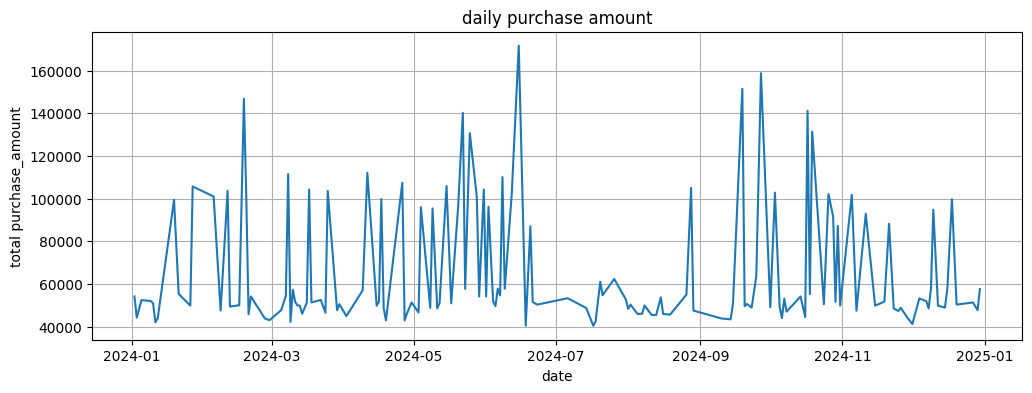

In [143]:
df_date_group = df_date.groupby("signup_date")["purchase_amount"].sum().reset_index()
plt.figure(figsize=(12,4))
plt.plot(df_date_group["signup_date"], df_date_group["purchase_amount"])
plt.xlabel("date")
plt.ylabel("total purchase_amount")
plt.title("daily purchase amount")
plt.grid(True)
plt.show()

In [138]:
df_export = df_date[["signup_date", "purchase_amount"]]
df_export.to_csv("/content/drive/MyDrive/daily_purchase_amount.csv", index=False)


## 周期性のある特徴量のサイクルエンコーディング

In [148]:
#月のサイクルエンコーディング
df_date["month_sin"] = np.sin(2 * np.pi * df_date["month"] / 12)
df_date["month_cos"] = np.cos(2 * np.pi * df_date["month"] / 12)

#曜日のサイクルエンコーディング
df_date["dayofweek_sin"] = np.sin(2 * np.pi * df_date["dayofweek"] / 7)
df_date["dayofweek_cos"] = np.cos(2 * np.pi * df_date["dayofweek"] / 7)

df_date[["month_sin", "month_cos", "dayofweek_sin", "dayofweek_cos"]]


,month_sin,month_cos,dayofweek_sin,dayofweek_cos
0,1.000000e+00,6.123234e-17,-0.433884,-0.900969
1,-8.660254e-01,5.000000e-01,-0.974928,-0.222521
2,-2.449294e-16,1.000000e+00,0.974928,-0.222521
3,-2.449294e-16,1.000000e+00,0.000000,1.000000
4,-5.000000e-01,8.660254e-01,0.781831,0.623490
...,...,...,...,...
195,-2.449294e-16,1.000000e+00,-0.974928,-0.222521
196,-5.000000e-01,8.660254e-01,0.433884,-0.900969
197,5.000000e-01,-8.660254e-01,0.433884,-0.900969
198,-8.660254e-01,-5.000000e-01,-0.433884,-0.900969


## クラスター分析による特徴量生成

In [149]:
!pip install scikit-learn==1.6.1

In [150]:
from sklearn.cluster import KMeans

df_temp = df_outlier.copy()

df_cluster = df_temp[["purchase_amount","purchase_count"]]

kmeans = KMeans(n_clusters=3)

df_temp["cluster_label"] = kmeans.fit_predict(df_cluster)
df_temp

,purchase_amount,purchase_count,gender,age_group,signup_date,churn,cluster_label
0,52500.0,17.000000,M,10s,2024-03-22,0,2
1,49300.0,14.000000,M,50s,2024-10-05,0,2
2,53200.0,14.000000,M,40s,2024-12-04,1,0
3,57600.0,25.000000,F,30s,2024-12-30,0,0
4,48800.0,11.000000,F,40s,2024-11-26,0,2
...,...,...,...,...,...,...,...
195,51900.0,23.000000,F,40s,2024-12-07,0,2
196,45600.0,15.015789,M,40s,2024-11-21,0,1
197,50800.0,25.000000,M,20s,2024-05-09,0,2
198,50300.0,7.000000,M,60s,2024-08-02,1,2


In [151]:
df_ex = df_date[["purchase_count", "purchase_amount"]]
df_ex.to_csv("ダウンロード/df_ex.csv", index=False)


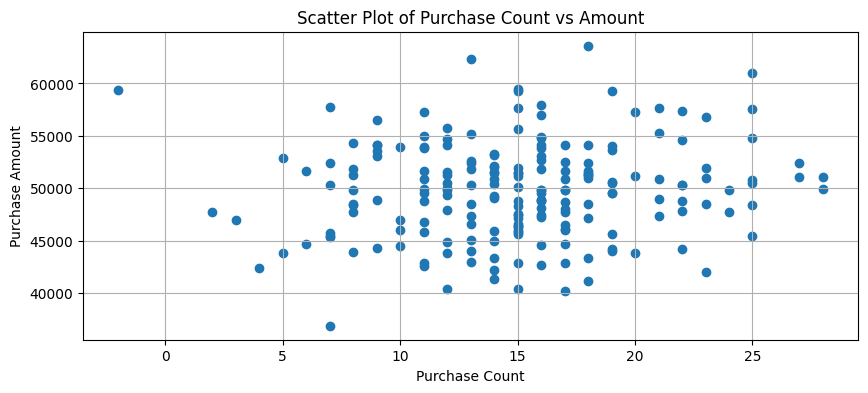

In [152]:
plt.figure(figsize=(10,4))
plt.scatter(df_ex["purchase_count"], df_ex["purchase_amount"])

# ラベルやグリッド線があると見やすくなります（任意）
plt.xlabel("Purchase Count")   # X軸のラベル
plt.ylabel("Purchase Amount")  # Y軸のラベル
plt.title("Scatter Plot of Purchase Count vs Amount") # タイトル
plt.grid(True)                 # グリッド線を表示

plt.show()

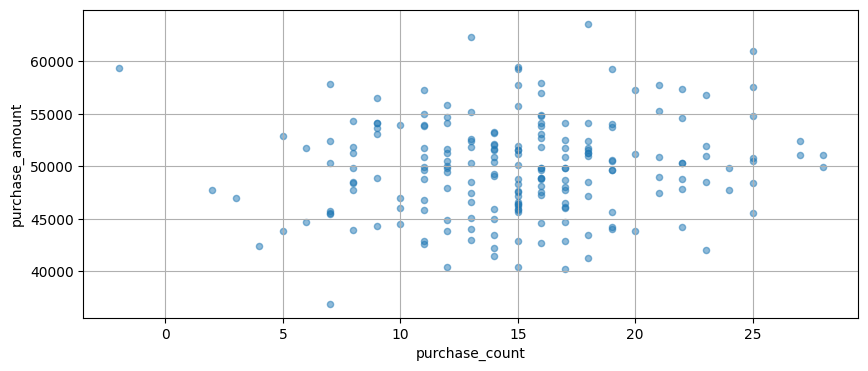

In [154]:
df_ex.plot.scatter(
    x="purchase_count",
    y="purchase_amount",
    figsize=(10, 4),
    grid=True,
    alpha= 0.5
)
plt.show()

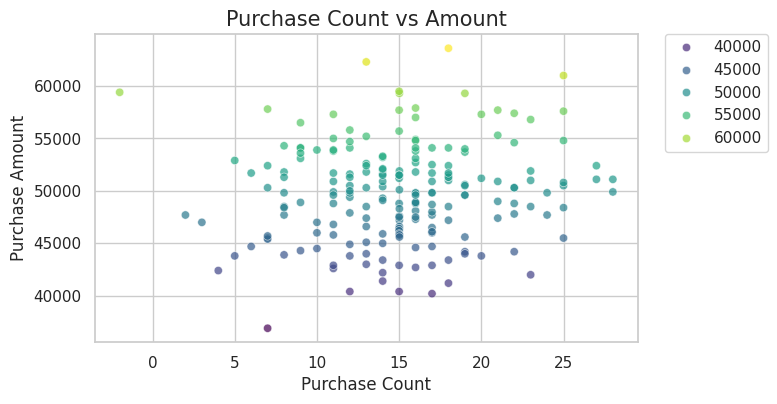

In [160]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=df_ex,
    x="purchase_count",
    y="purchase_amount",
    hue="purchase_amount",
    palette="viridis",
    alpha=0.7
)
plt.title("Purchase Count vs Amount", fontsize=15)
plt.xlabel("Purchase Count")
plt.ylabel("Purchase Amount")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.show()